In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torchvision  import models

In [44]:
device=torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
print(device)


mps


In [45]:
#Augmentation
transform = transforms.Compose([
	transforms.RandomRotation(10),
	transforms.RandomHorizontalFlip(),
	transforms.ToTensor(),
	transforms.Normalize((0.5,), (0.5,))
    

])

In [46]:
train_dataset=torchvision.datasets.FashionMNIST(root='data',download=False,train=True,transform=transform)
test_dataset=torchvision.datasets.FashionMNIST(root="data",download=False,train=False,transform=transforms.ToTensor())

In [47]:
train_loader=DataLoader(train_dataset,batch_size=64,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=64,shuffle=False)

In [48]:
#Loading the Resnet-18 weights
model=models.resnet18(weights='ResNet18_Weights.DEFAULT')
#Adjusting for input grey scale
model.conv1=nn.Conv2d(in_channels=1,out_channels=64,kernel_size=3,stride=1,padding=1,bias=False)
model.bn1=nn.BatchNorm2d(64)
model.fc=nn.Linear(model.fc.in_features,10)#as there are 10 classes in FashionMNIST
model=model.to(device)


In [49]:
#loss
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)


In [ ]:
#Training loop
num_epochs=100
for epoch in range(num_epochs):
    model.train()
    total_loss=0
    for images, labels in train_loader:
        images,labels=images.to(device),labels.to(device)

        optimizer.zero_grad()
        outputs=model(images)
        loss=criterion(outputs,labels)
        loss.backward()
        optimizer.step()

        total_loss+=loss.item()

    print(f"Epoch: {epoch}, Loss: {total_loss/len(train_loader)}")

Epoch: 0, Loss: 0.44597237296640746
Epoch: 1, Loss: 0.3057473830259177
Epoch: 2, Loss: 0.26318658511045134
Epoch: 3, Loss: 0.24193304436388555
Epoch: 4, Loss: 0.2253847660413429
Epoch: 5, Loss: 0.20929143402669856
Epoch: 6, Loss: 0.19557377837423576
Epoch: 7, Loss: 0.18341394389536717
Epoch: 8, Loss: 0.1720072875148865
Epoch: 9, Loss: 0.1695715296588568
Epoch: 10, Loss: 0.1523923664562293
Epoch: 11, Loss: 0.14710347333958726
Epoch: 12, Loss: 0.13649687780015696
Epoch: 13, Loss: 0.13014729221714838
Epoch: 14, Loss: 0.12540916416214218
Epoch: 15, Loss: 0.11721936811003954
Epoch: 16, Loss: 0.10841615159096303
Epoch: 17, Loss: 0.10261781455408822
Epoch: 18, Loss: 0.09854329702978544
Epoch: 19, Loss: 0.093036076212838
Epoch: 20, Loss: 0.08593201998676826
Epoch: 21, Loss: 0.08266794583154545
Epoch: 22, Loss: 0.07985315681683389
Epoch: 23, Loss: 0.07922484677062551
Epoch: 24, Loss: 0.0718055572519615
Epoch: 25, Loss: 0.06672534948266519
Epoch: 26, Loss: 0.06495553454054571
Epoch: 27, Loss: 0.

In [ ]:
print(device)

mps


In [ ]:
#Testing loop
model.eval()
correct=0
total=0

with torch.no_grad():
    for images, labels in test_loader:
        images,labels=images.to(device),labels.to(device)
        outputs=model(images)
        _,predicted=torch.max(outputs.data,1)
        total+=labels.size(0)
        correct+=(predicted==labels).sum().item()
accuracy=correct*100/total
print(f"Accuracy: {accuracy}")

Accuracy: 63.28


Epoch: 10/10, Loss: 0.0651
Accuracy: 65.21


ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

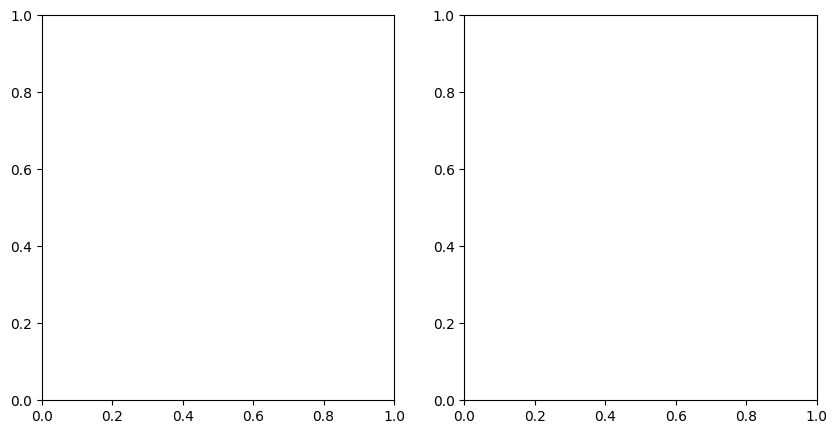

In [42]:
#Training loop with realtime plotting 
num_epochs=10
train_losses=[]
test_accuracy=[]
plt.ion()
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
for epoch in range(num_epochs):
    model.train()
    total_loss=0
    for images, labels in train_loader:
        images,labels=images.to(device),labels.to(device)

        optimizer.zero_grad()
        outputs=model(images)
        loss=criterion(outputs,labels)
        loss.backward()
        optimizer.step()

        total_loss+=loss.item()

avg_loss=total_loss/len(train_loader)
train_losses.append(avg_loss)
print(f"Epoch: {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")

# Evaluate on test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
accuracy = correct * 100 / total
test_accuracy.append(accuracy)
print(f"Accuracy: {accuracy}")



# Plotting
ax1.clear()
ax1.plot(range(1, epoch + 2), train_losses, marker='o') 
ax2.clear()
ax2.plot(range(1, epoch + 2), test_accuracy, marker='o')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss per Epoch')
ax1.legend()
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy (%)')
ax2.set_title('Test Accuracy per Epoch')
ax2.legend()

plt.pause(0.1)
plt.ioff()
plt.show()

